# **K Nearest Neighbors**

**Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Scratch Implementation of K Nearest Neighbors Algorithm**

In [ ]:
class KNN_Classifier():
    # Constructor function to initialize data members:
    def __init__(self, distance_metric):
        self.distance_metric = distance_metric

    # Function to get distance_metric:
    def get_distance_metric(self, training_data_point, test_data_point):
        distance = 0
        if self.distance_metric == 'euclidean':
            for i in range(len(training_data_point) - 1):
                distance = distance + ((training_data_point[i] - test_data_point[i])**2)
            return np.sqrt(distance)
        else:
            for i in range(len(training_data_point) - 1):
                distance = distance + abs(training_data_point[i] - test_data_point[i])
            return distance

    # Function to get K nearest neighbors:
    def nearest_neighbors(self, X_train, test_data_point, k):
        distance_list = []
        for training_data_point in X_train:
            distance = self.get_distance_metric(training_data_point, test_data_point)
            distance_list.append((training_data_point, distance))

        distance_list.sort(key = lambda x: x[1])
        neighbors_list = []
        for i in range(k):
            neighbors_list.append(distance_list[i][0])
        return neighbors_list

    # Prediction function:
    def predict(self, X_train, test_data, k):
        neighbors = self.nearest_neighbors(X_train, test_data, k)
        labels = []
        for neighbor in neighbors:
            labels.append(neighbor[-1])

        prediction = statistics.mode(labels)
        return prediction

In [ ]:
classifier = KNN_Classifier(distance_metric = 'euclidean')

In [ ]:
classifier2 = KNN_Classifier(distance_metric = 'manhattan')

**Loading Dataset into Pandas Dataframe**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/breast-cancer.csv")
df.shape

(569, 32)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Dataset Descriiption and Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Train Test Splitting**

In [ ]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [ ]:
X = df.drop(columns=['id', 'diagnosis'], axis=1)
Y = df['diagnosis']

In [ ]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
X_train = pd.concat([X_train, Y_train], axis=1)

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

**Model (strategy="euclidean") Evaluation on Training Dataset**

In [ ]:
Y_train_pred = classifier.predict(X_train, X_train[0], 5)
print("Actual Y_train[0]: ", X_train[0][-1])
print("Predicted Y_train_pred: ", Y_train_pred)

Actual Y_train[0]:  0.0
Predicted Y_train_pred:  0.0


In [ ]:
Y_train_pred = classifier.predict(X_train, X_train[1], 5)
print("Actual Y_train[1]: ", X_train[1][-1])
print("Predicted Y_train_pred: ", Y_train_pred)

Actual Y_train[1]:  1.0
Predicted Y_train_pred:  1.0


**Model (strategy="manhattan") Evaluation on Training Dataset**

In [ ]:
Y_train_pred = classifier2.predict(X_train, X_train[0], 5)
print("Actual Y_train[0]: ", X_train[0][-1])
print("Predicted Y_train_pred: ", Y_train_pred)

Actual Y_train[0]:  0.0
Predicted Y_train_pred:  0.0


In [ ]:
Y_train_pred = classifier2.predict(X_train, X_train[1], 5)
print("Actual Y_train[1]: ", X_train[1][-1])
print("Predicted Y_train_pred: ", Y_train_pred)

Actual Y_train[1]:  1.0
Predicted Y_train_pred:  1.0


**Model (strategy="euclidean") Evaluation on Testing Dataset**

In [ ]:
for i in range(11):
    Y_test_pred = classifier.predict(X_train, X_test[i], 5)
    print(f"Actual Y_test[{i}]: {Y_test[i]}")
    print(f"Predicted Y_test_pred[{i}]: {Y_test_pred}\n")

Actual Y_test[0]: 0
Predicted Y_test_pred[0]: 0.0

Actual Y_test[1]: 0
Predicted Y_test_pred[1]: 0.0

Actual Y_test[2]: 1
Predicted Y_test_pred[2]: 1.0

Actual Y_test[3]: 0
Predicted Y_test_pred[3]: 0.0

Actual Y_test[4]: 1
Predicted Y_test_pred[4]: 1.0

Actual Y_test[5]: 1
Predicted Y_test_pred[5]: 1.0

Actual Y_test[6]: 1
Predicted Y_test_pred[6]: 1.0

Actual Y_test[7]: 0
Predicted Y_test_pred[7]: 0.0

Actual Y_test[8]: 0
Predicted Y_test_pred[8]: 0.0

Actual Y_test[9]: 1
Predicted Y_test_pred[9]: 1.0

Actual Y_test[10]: 1
Predicted Y_test_pred[10]: 1.0



**Model (strategy="manhattan") Evaluation on Testing Dataset**

In [ ]:
for i in range(11):
    Y_test_pred = classifier2.predict(X_train, X_test[i], 5)
    print(f"Actual Y_test[{i}]: {Y_test[i]}")
    print(f"Predicted Y_test_pred[{i}]: {Y_test_pred}\n")

Actual Y_test[0]: 0
Predicted Y_test_pred[0]: 0.0

Actual Y_test[1]: 0
Predicted Y_test_pred[1]: 0.0

Actual Y_test[2]: 1
Predicted Y_test_pred[2]: 1.0

Actual Y_test[3]: 0
Predicted Y_test_pred[3]: 0.0

Actual Y_test[4]: 1
Predicted Y_test_pred[4]: 1.0

Actual Y_test[5]: 1
Predicted Y_test_pred[5]: 1.0

Actual Y_test[6]: 1
Predicted Y_test_pred[6]: 1.0

Actual Y_test[7]: 0
Predicted Y_test_pred[7]: 0.0

Actual Y_test[8]: 0
Predicted Y_test_pred[8]: 0.0

Actual Y_test[9]: 1
Predicted Y_test_pred[9]: 1.0

Actual Y_test[10]: 1
Predicted Y_test_pred[10]: 1.0



**Model Accuracy Score**

In [ ]:
Y_test_pred = []
for i in range(len(X_test)):
    Y_test_pred.append(classifier.predict(X_train, X_test[i], 5))
Y_test_pred = np.asarray(Y_test_pred, dtype=np.int64)

In [ ]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1])

In [ ]:
Y_test_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1])

In [ ]:
accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy of KNN model: {accuracy:.2%}")

Accuracy of KNN model: 95.61%


**Visualization of Actual v/s Predicted values**

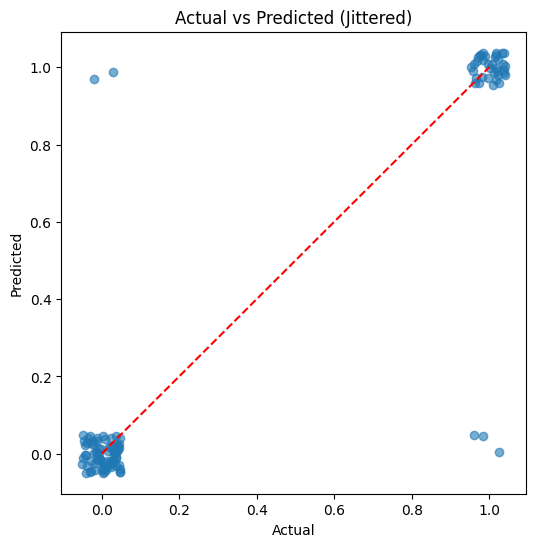

In [ ]:
jitter = 0.05
plt.figure(figsize=(6,6))
plt.scatter(Y_test + np.random.uniform(-jitter,jitter,len(Y_test)), Y_test_pred + np.random.uniform(-jitter,jitter,len(Y_test_pred)), alpha=0.6)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Jittered)")
plt.show()